## Importing Libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


In [4]:
# pip install scikit-learn

In [5]:
# !pip install hypopt

In [6]:
# !pip install pandas 

In [7]:
# !pip install matplotlib

In [8]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
 
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
 
# Importing hypopt library for grid search
from hypopt import GridSearch
 
# Importing Keras libraries
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, GlobalAveragePooling2D
 
import warnings
warnings.filterwarnings('ignore')

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
##Mounting Drive (only for colab. Not required on local machine)
# from google.colab import drive



# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/"


# Setting Paths for Train,Validation and Test Datasets

In [11]:
root_dir = 'E:/Github/flower-classification/Classification-using-Transfer-Learning/data'

PATH = os.path.join(root_dir, 'SplitDataset')

In [12]:
train_dir = os.path.join(PATH,'train')
validation_dir = os.path.join(PATH,'val')
test_dir = os.path.join(PATH,'test')

#Creating Category Labels

train_labels = []
validation_labels = []
test_labels = []

# Creating Label Data

In [13]:
for idx_cat,i in enumerate(os.listdir(train_dir)):
    train_files = train_dir+'/'+i
    for train_idx,j in enumerate(os.listdir(train_files)):
            train_labels.append(idx_cat)

In [14]:
for idx_cat,i in enumerate(os.listdir(validation_dir)):
    val_files = validation_dir+'/'+i
    for val_idx,j in enumerate(os.listdir(val_files)):
        validation_labels.append(idx_cat)

In [15]:
for idx_cat,i in enumerate(os.listdir(test_dir)):
    test_files = test_dir+'/'+i
    for train_idx,j in enumerate(os.listdir(test_files)):
        test_labels.append(idx_cat)

In [16]:
# list(set(New_train_labels))
img_width, img_height = 224, 224

## Display some pictures

In [17]:
# Show pictures
import os, random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
# from PIL import Image

def show_pictures(path):
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(img_tensor)
    plt.show()

In [18]:
# pip install Pillow


In [19]:
# import sys
# from PIL import Image
# sys.modules['Image'] = Image 

In [20]:
# import Image
# print(Image.__file__)

In [21]:
# from PIL import Image
# # print(Image.__file__)

daisy


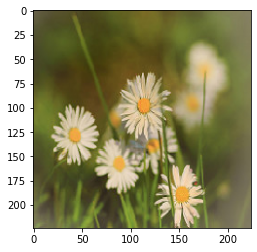

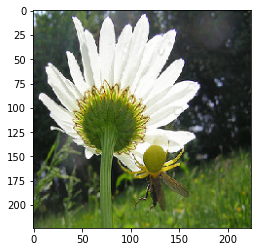

dandelion


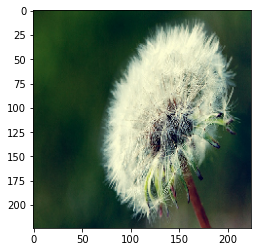

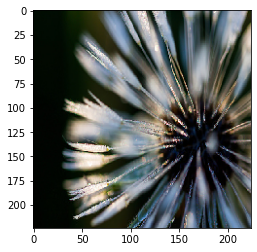

rose


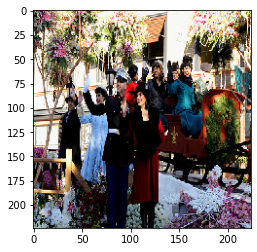

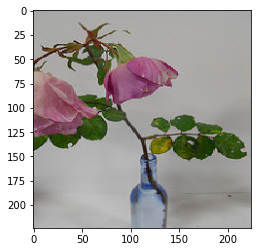

sunflower


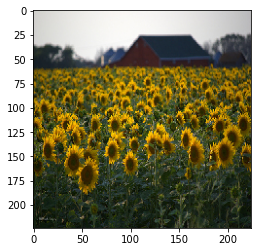

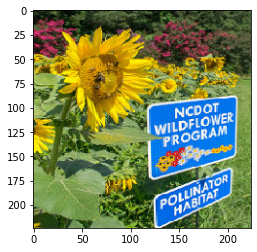

tulip


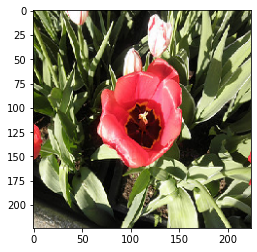

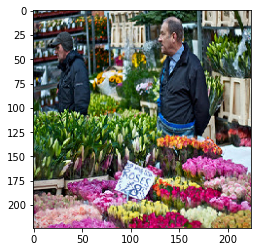

In [22]:
for i in (os.listdir(train_dir)):
  train_files = train_dir+'/'+i
  print(i)
  for i in range(0,2):
       show_pictures(train_files)

# VGG19 models after removing different layers

# 1 ) without removing any layer

In [23]:
#Defining the Model VGG19
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

image_input = Input(shape=(224, 224, 3))
VGG19_model1 = VGG19(input_tensor=image_input, include_top=True,weights='imagenet')
VGG19_model1.summary()
for layer in VGG19_model1.layers:
  layer.trainable = False

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# 2) Model after popping last dense layer

In [24]:
VGG19_model1.layers.pop() 
VGG19_model2 = Model(VGG19_model1.input, VGG19_model1.layers[-2].output)
VGG19_model2.summary()

for layer in VGG19_model2.layers:
  layer.trainable = False

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# 3) Model popping Last Fully Connected layer

In [25]:
VGG19_model2.layers.pop() 
VGG19_model3 = Model(VGG19_model2.input, VGG19_model2.layers[-2].output)
VGG19_model3.summary()


for layer in VGG19_model3.layers:
  layer.trainable = False

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

# 4) Model popping second last Fully Connected layer

In [26]:
for layer in VGG19_model3.layers:
  layer.trainable = False

VGG19_model3.layers.pop() 
VGG19_model4 = Model(VGG19_model3.input, VGG19_model3.layers[-2].output)
VGG19_model4.summary()

for layer in VGG19_model4.layers:
  layer.trainable = False

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

# Feature Extraction Code

In [33]:
#Extracting the feature Extraction

import tensorflow.keras as keras

from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

def images_to_array(dataset_dir,model):
 
        dataset_array = []
        
        classes_names = os.listdir(dataset_dir)

        for current_class_name in classes_names:
            class_dir = os.path.join(dataset_dir, current_class_name)
            images_in_class = os.listdir(class_dir)
            #print("Class index", class_counter, ", ", current_class_name, ":" , len(images_in_class))

            for image_file in images_in_class:
                     if image_file.endswith(".jpg"):
                        image_file_dir = os.path.join(class_dir, image_file)
                        img = keras.preprocessing.image.load_img(image_file_dir, target_size=(224, 224))
                        img_array = keras.preprocessing.image.img_to_array(img)
                        img_data = np.expand_dims(img_array, axis=0)
                        img_data = preprocess_input(img_data)
                        VGG19_feature = model.predict(img_data)
                        VGG19_feature_np = VGG19_feature.flatten()
                        dataset_array.append(VGG19_feature_np)
                        dataset_array_model = np.array(dataset_array)
                        dataset_array_model.shape

        return dataset_array_model

# Extracting Features for VGG19 models 

In [23]:
#Without popping any layer for VGG19
train_dataset_array1_VGG19 = images_to_array(dataset_dir=train_dir,model = VGG19_model1)
val_dataset_array1_VGG19 = images_to_array(dataset_dir=validation_dir,model = VGG19_model1)
test_dataset_array1_VGG19 = images_to_array(dataset_dir=test_dir,model = VGG19_model1)
print("Training Data Array Shape :", len(train_dataset_array1_VGG19))
print("Validation Data Array Shape :", len(val_dataset_array1_VGG19))
print("Test Data Array Shape :", len(test_dataset_array1_VGG19))

Training Data Array Shape : 2592
Validation Data Array Shape : 861
Test Data Array Shape : 870


In [24]:
#With popping first layer
train_dataset_array2_VGG19 = images_to_array(dataset_dir=train_dir,model = VGG19_model2)
val_dataset_array2_VGG19 = images_to_array(dataset_dir=validation_dir,model = VGG19_model2)
test_dataset_array2_VGG19 = images_to_array(dataset_dir=test_dir,model = VGG19_model2)
print("Training Data Array Shape :", len(train_dataset_array2_VGG19))
print("Validation Data Array Shape :", len(val_dataset_array2_VGG19))
print("Test Data Array Shape :", len(test_dataset_array2_VGG19))

Training Data Array Shape : 2592
Validation Data Array Shape : 861
Test Data Array Shape : 870


In [25]:
#With popping Second layer
train_dataset_array3_VGG19 = images_to_array(dataset_dir=train_dir,model = VGG19_model3)
val_dataset_array3_VGG19 = images_to_array(dataset_dir=validation_dir,model = VGG19_model3)
test_dataset_array3_VGG19 = images_to_array(dataset_dir=test_dir,model = VGG19_model3)
print("Training Data Array Shape :", len(train_dataset_array3_VGG19))
print("Validation Data Array Shape :", len(val_dataset_array3_VGG19))
print("Test Data Array Shape :", len(test_dataset_array3_VGG19))


Training Data Array Shape : 2592
Validation Data Array Shape : 861
Test Data Array Shape : 870


In [26]:
#With popping Third layer
train_dataset_array4_VGG19 = images_to_array(dataset_dir=train_dir,model = VGG19_model4)
val_dataset_array4_VGG19 = images_to_array(dataset_dir=validation_dir,model = VGG19_model4)
test_dataset_array4_VGG19 = images_to_array(dataset_dir=test_dir,model = VGG19_model4)
print("Training Data Array Shape :", len(train_dataset_array4_VGG19))
print("Validation Data Array Shape :", len(val_dataset_array4_VGG19))
print("Test Data Array Shape :", len(test_dataset_array4_VGG19))

Training Data Array Shape : 2592
Validation Data Array Shape : 861
Test Data Array Shape : 870


# Saving extracted features of VGG19

In [27]:
saving_path = os.path.join(root_dir, 'SavedFeatures/VGG19')

In [29]:
import numpy as np
np.save(os.path.join(saving_path,'train-features-0layer'), train_dataset_array1_VGG19)
np.save(os.path.join(saving_path,'train-labels-0layer'), train_labels)

np.save(os.path.join(saving_path,'val-features-0layer'), val_dataset_array1_VGG19)
np.save(os.path.join(saving_path,'val-labels-0layer'), validation_labels)

np.save(os.path.join(saving_path,'test-features-0layer'), test_dataset_array1_VGG19)
np.save(os.path.join(saving_path,'test-labels-0layer'), test_labels)

In [ ]:
import numpy as np
np.save(os.path.join(saving_path,'train-features-1layer'), train_dataset_array2_VGG19)
np.save(os.path.join(saving_path,'val-features-1layer'), val_dataset_array2_VGG19)
np.save(os.path.join(saving_path,'test-features-1layer'), test_dataset_array2_VGG19)

In [ ]:
import numpy as np
np.save(os.path.join(saving_path,'train-features-2layer'), train_dataset_array3_VGG19)
np.save(os.path.join(saving_path,'val-features-2layer'), val_dataset_array3_VGG19)
np.save(os.path.join(saving_path,'test-features-2layer'), test_dataset_array3_VGG19)

In [ ]:
import numpy as np
np.save(os.path.join(saving_path,'train-features-3layer'), train_dataset_array4_VGG19)
np.save(os.path.join(saving_path,'val-features-3layer'), val_dataset_array4_VGG19)
np.save(os.path.join(saving_path,'test-features-3layer'), test_dataset_array4_VGG19)

## Use the saved extracted features of VGG19

In [28]:
#Access the Features
import numpy as np
#np.load("/content/gdrive/My Drive/VGG19_Features/No_Layer_Removed/train-features-VGG19-0layer.npy")
train_dataset_array1_VGG19 = np.load(os.path.join(saving_path,'train-features-0layer.npy'))
train_labels = np.load(os.path.join(saving_path,'train-labels-0layer.npy'))

val_dataset_array1_VGG19 = np.load(os.path.join(saving_path,'val-features-0layer.npy'))
validation_labels = np.load(os.path.join(saving_path,'val-labels-0layer.npy'))

test_dataset_array1_VGG19 = np.load(os.path.join(saving_path,'test-features-0layer.npy'))
test_labels = np.load(os.path.join(saving_path,'test-labels-0layer.npy'))


In [29]:
train_dataset_array2_VGG19 = np.load(os.path.join(saving_path,'train-features-1layer.npy'))
val_dataset_array2_VGG19 = np.load(os.path.join(saving_path,'val-features-1layer.npy'))
test_dataset_array2_VGG19 = np.load(os.path.join(saving_path,'test-features-2layer.npy'))

In [30]:
train_dataset_array3_VGG19 = np.load(os.path.join(saving_path,'train-features-2layer.npy'))
val_dataset_array3_VGG19 = np.load(os.path.join(saving_path,'val-features-2layer.npy'))
test_dataset_array3_VGG19 = np.load(os.path.join(saving_path,'test-features-2layer.npy'))

In [35]:
train_dataset_array4_VGG19 = np.load(os.path.join(saving_path,'train-features-3layer.npy'))
val_dataset_array4_VGG19 = np.load(os.path.join(saving_path,'val-features-3layer.npy'))
test_dataset_array4_VGG19 = np.load(os.path.join(saving_path,'test-features-3layer.npy'))

## Creating Final Extracted Features and Target Labels

In [ ]:
#Clubbing Features
train_dataset_array1_VGG19 = np.concatenate((train_dataset_array1_VGG19, val_dataset_array1_VGG19))
train_dataset_array2_VGG19= np.concatenate((train_dataset_array2_VGG19, val_dataset_array2_VGG19))
train_dataset_array3_VGG19 = np.concatenate((train_dataset_array3_VGG19, val_dataset_array3_VGG19))
train_dataset_array4_VGG19 = np.concatenate((train_dataset_array4_VGG19, val_dataset_array4_VGG19))
train_labels = np.concatenate((train_labels, validation_labels))
# train_dataset_array1_VGG19.shape

# PCA


In [35]:

#############################################################################################
#           To be used only when the extracted features are too big 
#           PCA cn be used to reduce the the dimension of features

#############################################################################################


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.

train_dataset_array1_VGG19 = scaler.fit_transform(train_dataset_array1_VGG19)
train_dataset_array2_VGG19 = scaler.fit_transform(train_dataset_array2_VGG19)
train_dataset_array3_VGG19 = scaler.fit_transform(train_dataset_array3_VGG19)
train_dataset_array4_VGG19 = scaler.fit_transform(train_dataset_array4_VGG19)


# # # Apply transform to both the training set and the test set.


# train_dataset_array1_VGG19 = scaler.transform(train_dataset_array1_VGG19)
test_dataset_array1_VGG19 = scaler.fit_transform(test_dataset_array1_VGG19)

# train_dataset_array2_VGG19 = scaler.transform(train_dataset_array2_VGG19)
test_dataset_array2_VGG19 = scaler.fit_transform(test_dataset_array2_VGG19)

# train_dataset_array3_VGG19 = scaler.transform(train_dataset_array3_VGG19)
test_dataset_array3_VGG19 = scaler.fit_transform(test_dataset_array3_VGG19)

# train_dataset_array4_VGG19 = scaler.transform(train_dataset_array4_VGG19)
test_dataset_array4_VGG19 = scaler.fit_transform(test_dataset_array4_VGG19)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(.95)


train_dataset_array1_VGG19 = pca.fit_transform(train_dataset_array1_VGG19)
train_dataset_array2_VGG19 = pca.fit_transform(train_dataset_array2_VGG19)
train_dataset_array3_VGG19 = pca.fit_transform(train_dataset_array2_VGG19)
train_dataset_array4_VGG19 = pca.fit_transform(train_dataset_array4_VGG19)


# Apply transform to both the training set and the test set.



# train_dataset_array1_VGG19 = pca.transform(train_dataset_array1_VGG19)
test_dataset_array1_VGG19 = pca.fit_transform(test_dataset_array1_VGG19)

# train_dataset_array2_VGG19 = pca.transform(train_dataset_array2_VGG19)
test_dataset_array2_VGG19 = pca.fit_transform(test_dataset_array2_VGG19)

# train_dataset_array3_VGG19 = pca.transform(train_dataset_array3_VGG19)
test_dataset_array3_VGG19 = pca.fit_transform(test_dataset_array3_VGG19)

# train_dataset_array4_VGG19 = pca.transform(train_dataset_array4_VGG19)
test_dataset_array4_VGG19 = pca.fit_transform(test_dataset_array4_VGG19)



#

## Applying SVM Classifier on extracted models Features

In [45]:
#Implementing Classifier SVM
import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
# import sklearn.external as extjoblib
import joblib
from sklearn import svm, metrics, datasets

In [46]:
#Without removing any layer
def SVM_Classifier(train_dataset_array,New_train_labels,test_dataset_array):
      param_grid = [
        {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
        {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
      ]
      svc = svm.SVC()
      clf = GridSearchCV(svc, param_grid, refit = True, verbose = 3, n_jobs=-1)
      clf.fit(train_dataset_array,New_train_labels)
      y_predict_svm = clf.predict(test_dataset_array)
      return y_predict_svm

In [ ]:
# train_dataset_array1_VGG19.shape

In [ ]:
# np.shape(train_labels)

In [47]:
y_predict_svm1_VGG19 = SVM_Classifier(train_dataset_array1_VGG19,train_labels,test_dataset_array1_VGG19)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.7min finished


In [48]:
np.save('data/Classifier_results/y_predict_svm1_VGG19.npy',y_predict_svm1_VGG19)

In [49]:
y_predict_svm2_VGG19 = SVM_Classifier(train_dataset_array2_VGG19,train_labels,test_dataset_array2_VGG19)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 14.7min finished


In [50]:
np.save('data/Classifier_results/y_predict_svm2_VGG19.npy',y_predict_svm2_VGG19)

In [51]:
y_predict_svm3_VGG19 = SVM_Classifier(train_dataset_array3_VGG19,train_labels,test_dataset_array3_VGG19)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 21.3min finished


In [52]:
np.save('data/Classifier_results/y_predict_svm3_VGG19.npy',y_predict_svm3_VGG19)

In [53]:
y_predict_svm4_VGG19 = SVM_Classifier(train_dataset_array4_VGG19,train_labels,test_dataset_array4_VGG19)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 137.7min finished


In [54]:
np.save('data/Classifier_results/y_predict_svm4_VGG19.npy',y_predict_svm4_VGG19)

In [36]:
y_predict_svm1_VGG19 = np.load('data/Classifier_results/y_predict_svm1_VGG19.npy')
y_predict_svm2_VGG19 = np.load('data/Classifier_results/y_predict_svm2_VGG19.npy')
y_predict_svm3_VGG19 = np.load('data/Classifier_results/y_predict_svm3_VGG19.npy')
y_predict_svm4_VGG19 = np.load('data/Classifier_results/y_predict_svm4_VGG19.npy')


## Applying Random Forest Classifier on extracted model Features

In [55]:
def RF_Classifier(train_dataset_array,train_labels,test_dataset_array):
    #Import Random Forest Model
    from sklearn.ensemble import RandomForestClassifier

    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100, n_jobs=-1)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(train_dataset_array, train_labels)

    y_predict = clf.predict(test_dataset_array)
    return y_predict

In [56]:
y_predict_rf1_VGG19 = RF_Classifier(train_dataset_array1_VGG19,train_labels,test_dataset_array1_VGG19)

In [57]:
np.save("data/Classifier_results/y_predict_rf1_VGG19.npy",y_predict_rf1_VGG19)

In [58]:
y_predict_rf2_VGG19 = RF_Classifier(train_dataset_array2_VGG19,train_labels,test_dataset_array2_VGG19)

In [59]:
np.save("data/Classifier_results/y_predict_rf2_VGG19.npy",y_predict_rf2_VGG19)

In [60]:
y_predict_rf3_VGG19 = RF_Classifier(train_dataset_array3_VGG19,train_labels,test_dataset_array3_VGG19)

In [61]:
np.save("data/Classifier_results/y_predict_rf3_VGG19.npy",y_predict_rf3_VGG19)

In [62]:
y_predict_rf4_VGG19 = RF_Classifier(train_dataset_array4_VGG19,train_labels,test_dataset_array4_VGG19)

In [63]:
np.save("data/Classifier_results/y_predict_rf4_VGG19.npy",y_predict_rf4_VGG19)

In [37]:
y_predict_rf1_VGG19 = np.load('data/Classifier_results/y_predict_rf1_VGG19.npy')
y_predict_rf2_VGG19 = np.load('data/Classifier_results/y_predict_rf2_VGG19.npy')
y_predict_rf3_VGG19 = np.load('data/Classifier_results/y_predict_rf3_VGG19.npy')
y_predict_rf4_VGG19 = np.load('data/Classifier_results/y_predict_rf4_VGG19.npy')


## Applying XGBoost Classifier on extracted model Features

In [65]:
# pip install xgboost

In [66]:
def XGBoost_Classifier(train_dataset_array, New_train_labels,test_dataset_array):
  #XGBoost
  from numpy import loadtxt
  from xgboost import XGBClassifier

  # fit model no training data
  model = XGBClassifier( learning_rate =0.1,
              n_estimators=1000,
              max_depth=5,
              min_child_weight=1,
              gamma=0,
              subsample=0.8,
              colsample_bytree=0.8,
              objective= 'binary:logistic',
              nthread=4,
              scale_pos_weight=1,
              seed=27,
              n_jobs=-1)
 
  #model=XGBClassifier()
  model.fit(train_dataset_array, New_train_labels)
  y_predict = model.predict(test_dataset_array)
  return y_predict

In [67]:
y_predict_xg1_VGG19 = XGBoost_Classifier(train_dataset_array1_VGG19, train_labels,test_dataset_array1_VGG19)

[19:39:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [68]:
np.save("data/Classifier_results/y_predict_xg1_VGG19.npy",y_predict_xg1_VGG19)

In [69]:
y_predict_xg2_VGG19 = XGBoost_Classifier(train_dataset_array2_VGG19, train_labels,test_dataset_array2_VGG19)

[19:46:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [70]:
np.save("data/Classifier_results/y_predict_xg2_VGG19.npy",y_predict_xg2_VGG19)

In [71]:
y_predict_xg3_VGG19 = XGBoost_Classifier(train_dataset_array3_VGG19, train_labels,test_dataset_array3_VGG19)

[20:05:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [72]:
np.save("data/Classifier_results/y_predict_xg3_VGG19.npy",y_predict_xg3_VGG19)

In [73]:
y_predict_xg4_VGG19 = XGBoost_Classifier(train_dataset_array4_VGG19, train_labels,test_dataset_array4_VGG19)

[20:36:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [74]:
np.save("data/Classifier_results/y_predict_xg4_VGG19.npy",y_predict_xg4_VGG19)

In [38]:
y_predict_xg1_VGG19 = np.load('data/Classifier_results/y_predict_xg1_VGG19.npy')
y_predict_xg2_VGG19 = np.load('data/Classifier_results/y_predict_xg2_VGG19.npy')
y_predict_xg3_VGG19 = np.load('data/Classifier_results/y_predict_xg3_VGG19.npy')
y_predict_xg4_VGG19 = np.load('data/Classifier_results/y_predict_xg4_VGG19.npy')


## Applying Naive Bayes Classifier on extracted model Features

In [75]:
def NB_Classifier(train_dataset_array,train_labels,test_dataset_array):
  #Import Gaussian Naive Bayes model
  from sklearn.naive_bayes import GaussianNB

  #Create a Gaussian Classifier
  model = GaussianNB()

  # Train the model using the training sets
  model.fit(train_dataset_array,train_labels)
  y_predict = model.predict(test_dataset_array)
  return y_predict

In [76]:
y_predict_NB1_VGG19 = NB_Classifier(train_dataset_array1_VGG19,train_labels,test_dataset_array1_VGG19)

In [77]:
np.save("data/Classifier_results/y_predict_NB1_VGG19.npy",y_predict_NB1_VGG19)

In [78]:
y_predict_NB2_VGG19 = NB_Classifier(train_dataset_array2_VGG19,train_labels,test_dataset_array2_VGG19)

In [79]:
np.save("data/Classifier_results/y_predict_NB2_VGG19.npy",y_predict_NB2_VGG19)

In [80]:
y_predict_NB3_VGG19 = NB_Classifier(train_dataset_array3_VGG19,train_labels,test_dataset_array3_VGG19)

In [81]:
np.save("data/Classifier_results/y_predict_NB3_VGG19.npy",y_predict_NB3_VGG19)

In [82]:
y_predict_NB4_VGG19 = NB_Classifier(train_dataset_array4_VGG19,train_labels,test_dataset_array4_VGG19)

In [83]:
np.save("data/Classifier_results/y_predict_NB4_VGG19.npy",y_predict_NB4_VGG19)

In [39]:
y_predict_NB1_VGG19 = np.load('data/Classifier_results/y_predict_NB1_VGG19.npy')
y_predict_NB2_VGG19 = np.load('data/Classifier_results/y_predict_NB2_VGG19.npy')
y_predict_NB3_VGG19 = np.load('data/Classifier_results/y_predict_NB3_VGG19.npy')
y_predict_NB4_VGG19 = np.load('data/Classifier_results/y_predict_NB4_VGG19.npy')


## Applying Bayesian Ridge Classifier on extracted model Features

In [ ]:
def Ridge_Classifier(train_dataset_array, New_train_labels,test_dataset_array):
  from sklearn import linear_model
  from sklearn.linear_model import RidgeClassifier
  clf = RidgeClassifier().fit(train_dataset_array, New_train_labels)
  y_pred_br = clf.predict(test_dataset_array)
  return y_pred_br

In [ ]:
y_predict_Ridge1_VGG19 = Ridge_Classifier(train_dataset_array1_VGG19, train_labels,test_dataset_array1_VGG19)

In [ ]:
np.save("data/Classifier_results/y_predict_Ridge1_VGG19.npy",y_predict_Ridge1_VGG19)

In [ ]:
y_predict_Ridge2_VGG19 = Ridge_Classifier(train_dataset_array2_VGG19, train_labels,test_dataset_array2_VGG19)

In [ ]:
np.save("data/Classifier_results/y_predict_Ridge2_VGG19.npy",y_predict_Ridge2_VGG19)

In [ ]:
y_predict_Ridge3_VGG19 = Ridge_Classifier(train_dataset_array3_VGG19, train_labels,test_dataset_array3_VGG19)

In [ ]:
np.save("data/Classifier_results/y_predict_Ridge3_VGG19.npy",y_predict_Ridge3_VGG19)

In [ ]:
y_predict_Ridge4_VGG19 = Ridge_Classifier(train_dataset_array4_VGG19, train_labels,test_dataset_array4_VGG19)

In [ ]:
np.save("data/Classifier_results/y_predict_Ridge4_VGG19.npy",y_predict_Ridge4_VGG19)

In [40]:
y_predict_Ridge1_VGG19 = np.load('data/Classifier_results/y_predict_Ridge1_VGG19.npy')
y_predict_Ridge2_VGG19 = np.load('data/Classifier_results/y_predict_Ridge2_VGG19.npy')
y_predict_Ridge3_VGG19 = np.load('data/Classifier_results/y_predict_Ridge3_VGG19.npy')
y_predict_Ridge4_VGG19 = np.load('data/Classifier_results/y_predict_Ridge4_VGG19.npy')


In [ ]:
pip install PrettyTable

## Displaying Tabular Results for Accuracy

In [41]:
from prettytable import PrettyTable
print("\nVGG19(Accuracy):")
t = PrettyTable(['Removed Layer','SVM', 'Random Forest','XGBoost','Naive Bayes','Bayesian Ridge Regression'])
t.add_row([0, "{:.2%}".format(accuracy_score(test_labels,y_predict_svm1_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_rf1_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_xg1_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_NB1_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_Ridge1_VGG19))])
t.add_row([1, "{:.2%}".format(accuracy_score(test_labels,y_predict_svm2_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_rf2_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_xg2_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_NB2_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_Ridge2_VGG19))])
t.add_row([2, "{:.2%}".format(accuracy_score(test_labels,y_predict_svm3_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_rf3_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_xg3_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_NB3_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_Ridge3_VGG19))])
t.add_row([3, "{:.2%}".format(accuracy_score(test_labels,y_predict_svm4_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_rf4_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_xg4_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_NB4_VGG19)),"{:.2%}".format(accuracy_score(test_labels,y_predict_Ridge4_VGG19))])
print(t)


VGG19(Accuracy):
+---------------+--------+---------------+---------+-------------+---------------------------+
| Removed Layer |  SVM   | Random Forest | XGBoost | Naive Bayes | Bayesian Ridge Regression |
+---------------+--------+---------------+---------+-------------+---------------------------+
|       0       | 72.87% |     81.15%    |  85.17% |    55.63%   |           68.16%          |
|       1       | 22.87% |     25.52%    |  22.64% |    18.51%   |           17.59%          |
|       2       | 87.13% |     84.37%    |  88.39% |    80.80%   |           59.66%          |
|       3       | 86.90% |     83.10%    |  85.75% |    64.94%   |           82.07%          |
+---------------+--------+---------------+---------+-------------+---------------------------+


## Displaying Tabular Results for Precision

In [42]:
from sklearn.metrics import precision_score
print("\nVGG19(Precision):")
t = PrettyTable(['Removed Layer','SVM', 'Random Forest','XGBoost','Naive Bayes','Bayesian Ridge Regression'])
t.add_row([0, "{:.2%}".format(precision_score(test_labels,y_predict_svm1_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_rf1_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_xg1_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_NB1_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_Ridge1_VGG19, average='macro'))])
t.add_row([1, "{:.2%}".format(precision_score(test_labels,y_predict_svm2_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_rf2_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_xg2_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_NB2_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_Ridge2_VGG19, average='macro'))])
t.add_row([2, "{:.2%}".format(precision_score(test_labels,y_predict_svm3_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_rf3_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_xg3_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_NB3_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_Ridge3_VGG19, average='macro'))])
t.add_row([3, "{:.2%}".format(precision_score(test_labels,y_predict_svm4_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_rf4_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_xg4_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_NB4_VGG19, average='macro')),"{:.2%}".format(precision_score(test_labels,y_predict_Ridge4_VGG19, average='macro'))])
print(t)


VGG19(Precision):
+---------------+--------+---------------+---------+-------------+---------------------------+
| Removed Layer |  SVM   | Random Forest | XGBoost | Naive Bayes | Bayesian Ridge Regression |
+---------------+--------+---------------+---------+-------------+---------------------------+
|       0       | 72.44% |     81.74%    |  85.51% |    58.83%   |           67.84%          |
|       1       | 19.56% |     23.84%    |  30.29% |    16.79%   |           19.09%          |
|       2       | 87.45% |     84.97%    |  88.62% |    80.76%   |           60.04%          |
|       3       | 86.89% |     83.67%    |  85.79% |    65.10%   |           82.79%          |
+---------------+--------+---------------+---------+-------------+---------------------------+


## Displaying Tabular Results for Recall

In [43]:
from sklearn.metrics import recall_score
print("\nVGG19(Recall):")
t = PrettyTable(['Removed Layer','SVM', 'Random Forest','XGBoost','Naive Bayes','Bayesian Ridge Regression'])
t.add_row([0, "{:.2%}".format(recall_score(test_labels, y_predict_svm1_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_rf1_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_xg1_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_NB1_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_Ridge1_VGG19, average='macro'))])
t.add_row([1, "{:.2%}".format(recall_score(test_labels, y_predict_svm2_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_rf2_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_xg2_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_NB2_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_Ridge2_VGG19, average='macro'))])
t.add_row([2, "{:.2%}".format(recall_score(test_labels, y_predict_svm3_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_rf3_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_xg3_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_NB3_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_Ridge3_VGG19, average='macro'))])
t.add_row([3, "{:.2%}".format(recall_score(test_labels, y_predict_svm4_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_rf4_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_xg4_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_NB4_VGG19, average='macro')),"{:.2%}".format(recall_score(test_labels, y_predict_Ridge4_VGG19, average='macro'))])
print(t)


VGG19(Recall):
+---------------+--------+---------------+---------+-------------+---------------------------+
| Removed Layer |  SVM   | Random Forest | XGBoost | Naive Bayes | Bayesian Ridge Regression |
+---------------+--------+---------------+---------+-------------+---------------------------+
|       0       | 72.10% |     80.45%    |  84.79% |    55.52%   |           67.03%          |
|       1       | 20.12% |     23.53%    |  20.95% |    16.75%   |           18.64%          |
|       2       | 86.76% |     83.91%    |  88.12% |    80.22%   |           59.63%          |
|       3       | 86.71% |     82.40%    |  85.55% |    63.76%   |           81.57%          |
+---------------+--------+---------------+---------+-------------+---------------------------+


## Displaying Tabular Results for F1 Score

In [44]:
from sklearn.metrics import f1_score
print("\nVGG19(F1 Score):")
t = PrettyTable(['Removed Layer','SVM', 'Random Forest','XGBoost','Naive Bayes','Bayesian Ridge Regression'])
t.add_row([0, "{:.2%}".format(f1_score(test_labels, y_predict_svm1_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_rf1_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_xg1_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_NB1_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_Ridge1_VGG19, average='macro'))])
t.add_row([1, "{:.2%}".format(f1_score(test_labels, y_predict_svm2_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_rf2_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_xg2_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_NB2_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_Ridge2_VGG19, average='macro'))])
t.add_row([2, "{:.2%}".format(f1_score(test_labels, y_predict_svm3_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_rf3_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_xg3_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_NB3_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_Ridge3_VGG19, average='macro'))])
t.add_row([3, "{:.2%}".format(f1_score(test_labels, y_predict_svm4_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_rf4_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_xg4_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_NB4_VGG19, average='macro')),"{:.2%}".format(f1_score(test_labels, y_predict_Ridge4_VGG19, average='macro'))])
print(t)


VGG19(F1 Score):
+---------------+--------+---------------+---------+-------------+---------------------------+
| Removed Layer |  SVM   | Random Forest | XGBoost | Naive Bayes | Bayesian Ridge Regression |
+---------------+--------+---------------+---------+-------------+---------------------------+
|       0       | 72.18% |     80.87%    |  85.04% |    54.77%   |           67.00%          |
|       1       | 7.85%  |     22.38%    |  18.28% |    13.62%   |           17.41%          |
|       2       | 86.99% |     84.27%    |  88.32% |    80.40%   |           59.62%          |
|       3       | 86.75% |     82.86%    |  85.65% |    63.90%   |           82.01%          |
+---------------+--------+---------------+---------+-------------+---------------------------+
